In [13]:
from lifelines.datasets import load_waltons
from lifelines import KaplanMeierFitter

import seaborn as sns
sns.set()

%matplotlib inline

In [21]:
df = load_waltons() # returns a Pandas DataFrame

df.head()

,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
4,19.0,1,miR-137


In [5]:
df.shape

(163, 3)

In [6]:
df['group'].unique()

array(['miR-137', 'control'], dtype=object)

In [7]:
T = df['T']
E = df['E']

T is an array of durations, E is a either boolean or binary array representing whether the “death” was observed (alternatively an individual can be censored).

In [66]:
kmf = KaplanMeierFitter()
kmf.fit(T, E)

<lifelines.KaplanMeierFitter: fitted with 163 observations, 7 censored>

In [67]:
E.sum()

156

In [68]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
6.0,0.993865
7.0,0.987730
9.0,0.969210
13.0,0.950690
15.0,0.938344
17.0,0.932170
19.0,0.913650
22.0,0.888957


In [69]:
kmf.median_

56.0

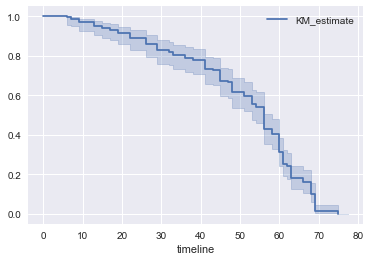

In [70]:
kmf.plot()

### Multiple groups

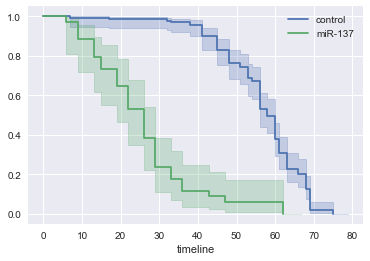

In [33]:
ix = df['group'] == 'miR-137'

kmf.fit(T[~ix], E[~ix], 
        label='control')
ax = kmf.plot()

kmf.fit(T[ix], E[ix], 
        label='miR-137')
kmf.plot(ax=ax)

### Cumulative hazard rate

In [34]:
from lifelines import NelsonAalenFitter

In [35]:
naf = NelsonAalenFitter()
naf.fit(T, event_observed=E)

<lifelines.NelsonAalenFitter: fitted with 163 observations, 7 censored>

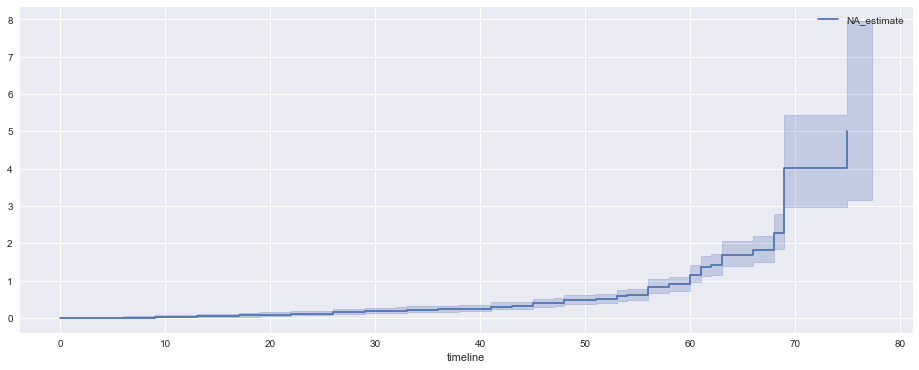

In [53]:
naf.plot(figsize=(16,6))

### Survival Regression

In [37]:
from lifelines.datasets import load_regression_dataset
regression_dataset = load_regression_dataset()

regression_dataset.head()

,var1,var2,var3,T,E
0,0.595170,1.143472,1.571079,14.785479,1
1,0.209325,0.184677,0.356980,7.336734,1
2,0.693919,0.071893,0.557960,5.271527,1
3,0.443804,1.364646,0.374221,11.684168,1
4,1.613324,0.125566,1.921325,7.637764,1


In [38]:
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(regression_dataset, 'T', event_col='E')
cph.print_summary()

n=200, number of events=189

       coef  exp(coef)  se(coef)      z      p  lower 0.95  upper 0.95    
var1 0.2214     1.2478    0.0743 2.9807 0.0029      0.0758      0.3669  **
var2 0.0508     1.0521    0.0829 0.6129 0.5400     -0.1117      0.2133    
var3 0.2187     1.2444    0.0758 2.8851 0.0039      0.0701      0.3672  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.580
Likelihood ratio test = 15.508 on 3 df, p=0.00143


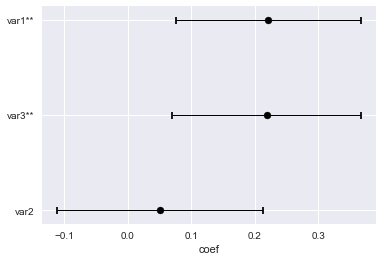

In [39]:
cph.plot()

In [41]:
# Using Aalen's Additive model
from lifelines import AalenAdditiveFitter
aaf = AalenAdditiveFitter(fit_intercept=False)
aaf.fit(regression_dataset, 'T', event_col='E')

<lifelines.AalenAdditiveFitter: fitted with 200 observations, 11 censored>

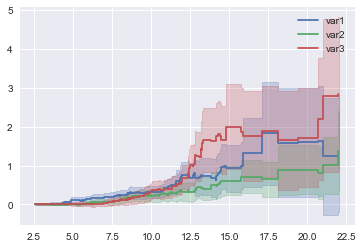

In [46]:
aaf.plot()

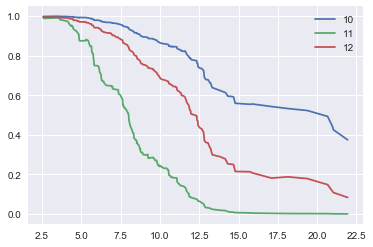

In [47]:
X = regression_dataset.drop(['E', 'T'], axis=1)
aaf.predict_survival_function(X.iloc[10:13]).plot()  # get the unique survival functions of two subjects